In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the city data file and store it in a pandas DataFrame.
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
total_rides_by_cityType = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_cityType

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
total_drivers_by_cityType = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_cityType

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
total_fares_by_cityType = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_cityType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
avg_fare_per_ride_by_cityType = total_fares_by_cityType / total_rides_by_cityType
avg_fare_per_ride_by_cityType

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
avg_fare_per_driver_by_cityType = total_fares_by_cityType / total_drivers_by_cityType
avg_fare_per_driver_by_cityType

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
pyber_summary_df = pd.DataFrame (
                {"Total Rides": total_rides_by_cityType,
                  "Total Drivers": total_drivers_by_cityType,
                  "Total Fares": total_fares_by_cityType,
                  "Average Fare per Ride": avg_fare_per_ride_by_cityType,
                  "Average Fare per Driver": avg_fare_per_driver_by_cityType})

pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#Formatting pyber_summary_df

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [13]:
#Rename dataframe columns
pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'} )
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
pyber_data_df = pyber_data_df.set_index(["Date"])

pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [15]:
pyber_data_df2=pyber_data_df.copy()

In [16]:
#Create a new DataFrame for fares and include only the Date, City Type, and Fare columns
pyber_data_df2=pyber_data_df2.drop(columns=["City","Ride Id","No. Drivers"])
pyber_data_df2

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [17]:
pyber_data_df2.index=pd.to_datetime(pyber_data_df2.index)
pyber_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [18]:
sum_fare_by_cityType_df = pd.DataFrame(pyber_data_df2.groupby(["City Type","Date"]).sum()["Fare"])
#sum_fare_by_cityType_df["Fare"]=sum_fare_by_cityType_df["Fare"].map("${:.2f}". format)

sum_fare_by_cityType_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [19]:
sum_fare_by_cityType_df=sum_fare_by_cityType_df.reset_index("City Type")
sum_fare_by_cityType_df

,City Type,Fare
Date,,
2019-01-01 09:45:36,Rural,43.69
2019-01-02 11:18:32,Rural,52.12
2019-01-03 19:51:01,Rural,19.90
2019-01-04 03:31:26,Rural,24.88
2019-01-06 07:38:40,Rural,47.33
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [20]:
import numpy as np
sum_fare_by_cityType_pivot=pd.pivot_table(sum_fare_by_cityType_df, values = "Fare", index =["Date"], columns = ["City Type"], aggfunc=np.sum)
sum_fare_by_cityType_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [21]:
sum_fare_by_cityType_pivot_range = sum_fare_by_cityType_pivot.loc[(sum_fare_by_cityType_pivot.index>='2019-01-01') & 
                                                                (sum_fare_by_cityType_pivot.index <='2019-04-28') ]
sum_fare_by_cityType_pivot_range

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [22]:
weekly_bin = pd.DataFrame(sum_fare_by_cityType_pivot_range.resample("W").sum())
weekly_bin

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [23]:
weekly_bin_df=weekly_bin.reset_index("Date")
weekly_bin_df

City Type,Date,Rural,Suburban,Urban
0,2019-01-06,187.92,721.60,1661.68
1,2019-01-13,67.65,1105.13,2050.43
2,2019-01-20,306.00,1218.20,1939.02
3,2019-01-27,179.69,1203.28,2129.51
4,2019-02-03,333.08,1042.79,2086.94
5,2019-02-10,115.80,974.34,2162.64
6,2019-02-17,95.82,1045.50,2235.07
7,2019-02-24,419.06,1412.74,2466.29
8,2019-03-03,175.14,858.46,2218.20
9,2019-03-10,303.94,925.27,2470.93


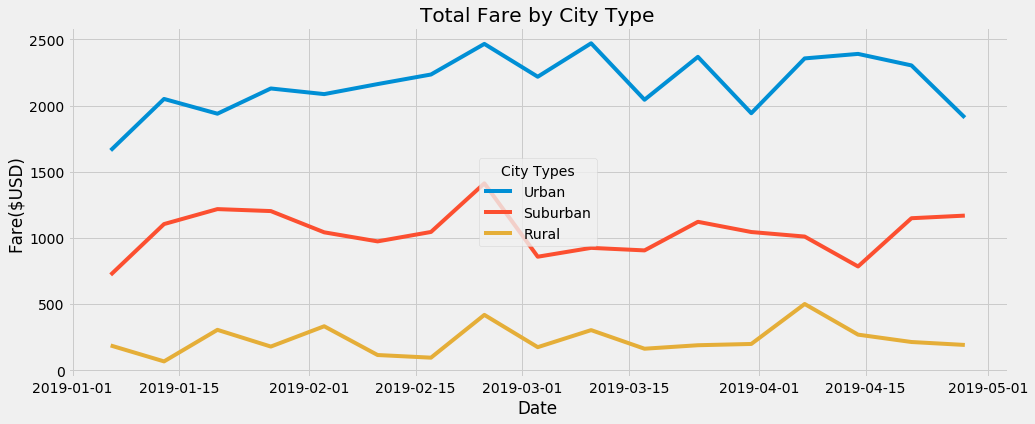

In [33]:
import matplotlib.pyplot as plt

# Setting FiveThirtyEight style
fig, ax = plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')

ax.plot(weekly_bin_df["Date"], weekly_bin_df["Urban"],label="Urban")
ax.plot(weekly_bin_df["Date"], weekly_bin_df["Suburban"],label="Suburban")
ax.plot(weekly_bin_df["Date"], weekly_bin_df["Rural"],label="Rural")
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Date")
ax.set_ylabel("Fare($USD)")
ax.legend(title="City Types",loc="center")

plt.savefig("analysis/Fig8_538style.png")

plt.show()